In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [3]:
y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis=1)
X_test = test.copy()

In [4]:
#Delete unneeded dataframes

del train, test

In [5]:
#Combine training and test dataframes, keep index of split
train_index = len(X_train)

all_data = pd.concat([X_train, X_test], ignore_index=True)
all_data.shape

(2919, 79)

# Feature Engineering

In [6]:
from preprocess import impute

all_data = impute(all_data)

In [7]:
#Total SF
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [8]:
#Drop unwanted columns
all_data.drop("BsmtCond", axis =1 , inplace = True)
all_data.drop("RoofMatl", axis =1 , inplace = True)
all_data.drop("MasVnrArea", axis =1 , inplace = True)
all_data.drop("BsmtHalfBath", axis =1 , inplace = True)
all_data.drop("GarageCars", axis =1 , inplace = True)
all_data.drop("YearRemodAdd", axis =1 , inplace = True)
all_data.drop("Street", axis =1 , inplace = True)
all_data.drop("LandSlope", axis =1 , inplace = True)
all_data.drop("RoofStyle", axis =1 , inplace = True)
all_data.drop("Exterior2nd", axis =1 , inplace = True)
all_data.drop("ExterCond", axis =1 , inplace = True)
all_data.drop("BsmtFinSF1", axis =1 , inplace = True)
all_data.drop("BsmtFinType2", axis =1 , inplace = True)
all_data.drop("BsmtUnfSF", axis =1 , inplace = True) #Good through here
all_data.drop("1stFlrSF", axis =1 , inplace = True)
all_data.drop("2ndFlrSF", axis =1 , inplace = True)
all_data.drop("KitchenAbvGr", axis =1 , inplace = True)
all_data.drop("FireplaceQu", axis =1 , inplace = True)
all_data.drop("GarageYrBlt", axis =1 , inplace = True)
all_data.drop("PoolArea", axis =1 , inplace = True)
all_data.drop("Fence", axis =1 , inplace = True)
all_data.drop("MiscFeature", axis =1 , inplace = True)
all_data.drop("MiscVal", axis =1 , inplace = True)
all_data.drop("SaleType", axis =1 , inplace = True)

In [9]:
#Feature Engineering

all_data['LotArea'] = all_data['LotArea'].map(lambda x: np.log10(x))
all_data['YrSold'] = all_data['YrSold'].map(lambda x: int(x))
all_data['YearBuilt'] = all_data['YearBuilt'].map(lambda x: 1950 if x < 1950 else x)
all_data['LowQualFinSF'] = all_data['LowQualFinSF'].map(lambda x: 1 if x > 0 else 0)
all_data['HalfBath'] = all_data['HalfBath'].map(lambda x: 1 if x > 0 else 0)
all_data['MoSold'] = all_data['MoSold'].map(lambda x: int(x))
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].map(lambda x: 1 if x > 0 else 0)
all_data['Fireplaces'] = all_data['Fireplaces'].map(lambda x: 1 if x > 0 else 0)
all_data['PoolQC'] = all_data['PoolQC'].map(lambda x: 0 if x == "None" else 1)
all_data['Condition1'] = all_data['Condition1'] + all_data['Condition2']
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].map(lambda x: 1 if x == "GLQ" else 0)
all_data['Heating'] = all_data['Heating'].map(lambda x: 1 if x == "GasA" else 0)
all_data['CentralAir'] = all_data['CentralAir'].map(lambda x: 1 if x == "Y" else 0)
all_data['Functional'] = all_data['Functional'].map(lambda x: 1 if x == "Typ" else 0)
all_data['Alley'] = all_data['Alley'].map(lambda x: 1 if x == "Grvl" else 0)
all_data['LotShape'] = all_data['LotShape'].map(lambda x: 1 if x == "Reg" else 0)
all_data['OverallCond'] = all_data['OverallCond'].map(lambda x: 1 if x in ['7','8','9'] else 0)
all_data['BsmtExposure'] = all_data['BsmtExposure'].map(lambda x: 1 if x in ['Gd','Av'] else 0)
all_data['HeatingQC'] = all_data['HeatingQC'].map(lambda x: 1 if x == 'Ex' else 0)
all_data['Electrical'] = all_data['Electrical'].map(lambda x: 1 if x == 'SBrkr' else 0)
all_data['PavedDrive'] = all_data['PavedDrive'].map(lambda x: 1 if x == 'Y' else 0)
all_data['SaleCondition'] = all_data['SaleCondition'].map(lambda x: 'Abnorml' if x in 
                                                          ['Abnorml','AdjLand','Alloca','Family'] else x)
all_data['BldgType'] = all_data['BldgType'].map(lambda x: 'Townhouse' if x in ['Twnhs','TwnhsE'] else x)
all_data['BldgType'] = all_data['BldgType'].map(lambda x: 'ConvDup' if x in ['2fmCon','Duplex'] else x)
all_data['BsmtQual'] = all_data['BsmtQual'].map(lambda x: 4 if x == "Ex" else x)
all_data['BsmtQual'] = all_data['BsmtQual'].map(lambda x: 3 if x == "Gd" else x)
all_data['BsmtQual'] = all_data['BsmtQual'].map(lambda x: 2 if x == "TA" else x)
all_data['BsmtQual'] = all_data['BsmtQual'].map(lambda x: 1 if x in ["Fa","None"] else x)
all_data['MasVnrType'] = all_data['MasVnrType'].map(lambda x: 'None' if x == "BrkCmn" else x)
all_data['ExterQual'] = all_data['ExterQual'].map(lambda x: 'TA' if x == 'Fa' else x)
deck_df = all_data[['WoodDeckSF','3SsnPorch','OpenPorchSF','EnclosedPorch','ScreenPorch']]
all_data['MaxDeckSF'] = deck_df.max(axis=1)

#Drop additional deck SF features

all_data.drop("WoodDeckSF", axis =1 , inplace = True)
all_data.drop("3SsnPorch", axis =1 , inplace = True)
all_data.drop("OpenPorchSF", axis =1 , inplace = True)
all_data.drop("EnclosedPorch", axis =1 , inplace = True)
all_data.drop("ScreenPorch", axis =1 , inplace = True)

In [10]:
#One-Hot Encoding

use_cols = ['Neighborhood','Condition1','MSZoning','LandContour','LotConfig','BldgType','KitchenQual','GarageQual',
            'MasVnrType','ExterQual','SaleCondition']
one_hot_df = pd.get_dummies(all_data[use_cols], drop_first = True, dummy_na = False)
all_data = pd.concat([one_hot_df, all_data], axis=1)

#Drop now unnecessary features

all_data.drop("Neighborhood", axis =1 , inplace = True)
all_data.drop("Condition1", axis =1 , inplace = True)
all_data.drop("MSZoning", axis =1 , inplace = True)
all_data.drop("LandContour", axis =1 , inplace = True)
all_data.drop("LotConfig", axis =1 , inplace = True)
all_data.drop("BldgType", axis =1 , inplace = True)
all_data.drop("KitchenQual", axis =1 , inplace = True)
all_data.drop("GarageQual", axis =1 , inplace = True)
all_data.drop("MasVnrType", axis =1 , inplace = True)
all_data.drop("ExterQual", axis =1 , inplace = True)
all_data.drop("SaleCondition", axis =1 , inplace = True)

In [11]:
#One-Hot Encoding w/o Dropping First

use_cols_KF = ['Exterior1st','HouseStyle','Foundation','GarageType','GarageFinish']

one_hot_dfKF = pd.get_dummies(all_data[use_cols_KF], drop_first = False, dummy_na = False)

all_data = pd.concat([one_hot_dfKF, all_data], axis = 1)

In [12]:
#Dropping low frequency features

all_data.drop("Exterior1st_Stone", axis = 1, inplace = True)
all_data.drop("Exterior1st_BrkComm", axis = 1, inplace = True)
all_data.drop("Exterior1st_ImStucc", axis = 1, inplace = True)
all_data.drop("Exterior1st_AsphShn", axis = 1, inplace = True)
all_data.drop("Exterior1st_CBlock", axis = 1, inplace = True)

all_data.drop("HouseStyle_1.5Unf", axis = 1, inplace = True)
all_data.drop("HouseStyle_2.5Unf", axis = 1, inplace = True)
all_data.drop("HouseStyle_2.5Fin", axis = 1, inplace = True)

all_data.drop("Foundation_Slab", axis = 1, inplace = True)
all_data.drop("Foundation_Stone", axis = 1, inplace = True)
all_data.drop("Foundation_Wood", axis = 1, inplace = True)

all_data.drop("GarageType_Basment", axis = 1, inplace = True)
all_data.drop("GarageType_CarPort", axis = 1, inplace = True)
all_data.drop("GarageType_2Types", axis = 1, inplace = True)

#Dropping now unnecessary features

all_data.drop("Exterior1st", axis = 1, inplace = True)
all_data.drop("HouseStyle", axis = 1, inplace = True)
all_data.drop("Foundation", axis = 1, inplace = True)
all_data.drop("GarageType", axis = 1, inplace = True)
all_data.drop("GarageFinish", axis = 1, inplace = True)
all_data.drop("GarageCond", axis = 1, inplace = True)
all_data.drop("Condition2", axis =1, inplace = True)

In [13]:
#Re-splitting into training and test feature dataframes

X_train = all_data.iloc[:train_index, :]
X_test = all_data.iloc[train_index: , :]

In [14]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

# Training Basic Models

In [15]:
from sklearn.linear_model import LinearRegression #try simple linear model first

ols = LinearRegression()
ols.fit(X_train, y_train)
print(ols.score(X_train, y_train))
print(rmsle(y_train, ols.predict(X_train)))

0.886493674002
0.133733848902


In [16]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
import sklearn.feature_selection as fs

percent80 = fs.SelectPercentile(fs.chi2, 80).fit_transform(X_train, y_train)  #only keep features in top 80%
ols.fit(percent80, y_train)
print(ols.score(percent80, y_train))
print(rmsle(y_train, ols.predict(percent80)))

0.875767275866
0.142014249732


In [18]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha = 1) #Ridge regression
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train)) #Ridge R^2
print(rmsle(y_train, ridge.predict(X_train))) #Ridge RMSLE

0.884820643374
0.135278231681


In [19]:
#Try Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(rmsle(y_train, lasso.predict(X_train)))

0.886452482971
0.133637540646


c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [20]:
from sklearn import tree

clf = tree.DecisionTreeRegressor() #Decision tree with no constraints
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(rmsle(y_train, clf.predict(X_train))) #Dramatically overfit

0.999996259195
0.00105860122225


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rmsle(y_train, rf.predict(X_train))) 

0.977247069531
0.0694618734093


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(rmsle(y_train, gb.predict(X_train))) #Ok score

0.961331893461
0.0987806582948


In [23]:
#Submit to public leaderboard

firstSubmit = rf.predict(X_test)
submitDF = pd.DataFrame(firstSubmit, test_ID).reset_index()
submitDF.columns = ['Id','SalePrice']
submitDF.to_csv('submissions.csv', index = False) #.15726 (37th percentile on Kaggle)

# Tune Lasso

In [24]:
from sklearn.linear_model import LassoCV

CVL = LassoCV(alphas = range(5,100,2))

CVL.fit(X_train, y_train)
print(CVL.score(X_train, y_train))
print(rmsle(y_train, CVL.predict(X_train)))

c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.885009819929
0.135140908661


c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
CVL.alpha_

17

# Tuning Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3]}]

rfTune = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)

In [27]:
#rfTune.fit(X_train, y_train)

In [28]:
#rfTune.best_estimator_

In [29]:
#rfTune.best_params_

In [30]:
rfBest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rfBest.fit(X_train, y_train)
print(rfBest.score(X_train, y_train))
print(rmsle(y_train, rfBest.predict(X_train))) ## Optimally tuned random forest

0.978655643999
0.0623221909173


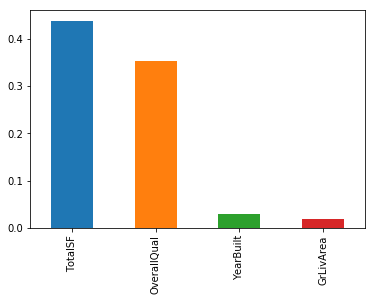

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

feat_importances = pd.Series(rfBest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='bar')

In [32]:
secondSubmit = rfBest.predict(X_test)
submitDF2 = pd.DataFrame(secondSubmit, test_ID).reset_index()
submitDF2.columns = ['Id','SalePrice']
submitDF2.to_csv('submissions2.csv', index = False) #RMSLE .14607, 2310/4376 [47th percentile]

# Tune Gradient Boosting Model

In [33]:
gmb_tune_parameters = [{'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 300, 500], 'max_depth': [None,1,2,3] , 
                        'min_samples_split': [2, 3]}]

gmbTune = GridSearchCV(GradientBoostingRegressor(), gmb_tune_parameters, cv=5, n_jobs=-1, verbose=1)

In [34]:
#gmbTune.fit(X_train, y_train)

In [35]:
#gmbTune.best_estimator_

In [36]:
#gmbTune.best_params_

In [37]:
gmbBest = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

gmbBest.fit(X_train, y_train)
print(gmbBest.score(X_train, y_train))
print(rmsle(y_train, gmbBest.predict(X_train))) ## Optimally tuned boosting

0.965156787805
0.0900082312752


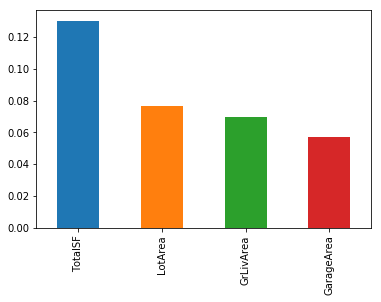

In [38]:
feat_importances_gmb = pd.Series(gmbBest.feature_importances_, index=X_train.columns)
feat_importances_gmb.nlargest(4).plot(kind='bar')

In [39]:
thirdSubmit = gmbBest.predict(X_test)
submitDF3 = pd.DataFrame(thirdSubmit, test_ID).reset_index()
submitDF3.columns = ['Id','SalePrice']
submitDF3.to_csv('submission3.csv', index = False) #RMSLE .14072, 2071/4376 [53rd percentile]

# Stacking

In [56]:
from stacking import stacking_regression

models = [
    
    Lasso(alpha = 17),

    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
    
    GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

]

meta_model = LinearRegression(normalize = True)

In [57]:
%%time 

final_prediction = stacking_regression(models, meta_model, X_train, y_train, X_test, metric = rmsle, verbose = 1)

metric: [rmsle]

model 0: [Lasso]


c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


    ----
    MEAN:   [0.15740896]

model 1: [RandomForestRegressor]
    ----
    MEAN:   [0.14892217]

model 2: [GradientBoostingRegressor]
    ----
    MEAN:   [0.13888901]

Wall time: 38.6 s


In [60]:
submitDF4 = pd.DataFrame(final_prediction, test_ID).reset_index()
submitDF4.columns = ['Id','SalePrice']
submitDF4.to_csv('submission4.csv', index = False) #RMSLE .13043, 1551/4392 [Top 35%]